# Lecture 04 a

## Multivariate Gaussian Classifier

### task1a: load dataset
trainA.dat, trainB.dat,....

In [11]:
import numpy as np

# TODO: 加载训练数据和测试数据
trainA = np.loadtxt("dataLec04/trainA.dat")
trainB = np.loadtxt("dataLec04/trainB.dat")
trainC = np.loadtxt("dataLec04/trainC.dat")
testA = np.loadtxt("dataLec04/testA.dat")
testB = np.loadtxt("dataLec04/testB.dat")
testC = np.loadtxt("dataLec04/testC.dat")

#### Q: How many points from each class for training and how many for testing? How many features?

In [12]:
print('train A:', trainA.shape)
print('train B:', trainB.shape)
print('train C:', trainC.shape)
print('test A:', testA.shape)
print('test B:', testB.shape)
print('test C:', testC.shape)


train A: (200, 2)
train B: (200, 2)
train C: (200, 2)
test A: (100, 2)
test B: (100, 2)
test C: (100, 2)


### task1b: plot scatters

In [13]:
import matplotlib.pyplot as plt
import numpy as np

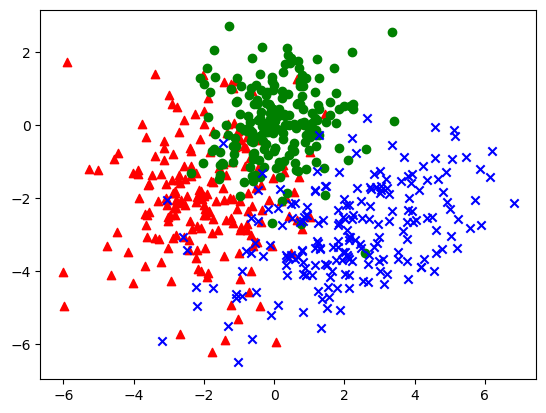

In [14]:
import matplotlib.pyplot as plt

# 绘制trainA的散点图，红色，标记为'^'
plt.scatter(trainA[:, 0], trainA[:, 1], marker='^', c='r')

# 绘制trainB的散点图，绿色，标记为'o'
plt.scatter(trainB[:, 0], trainB[:, 1], marker='o', c='g')

# 绘制trainC的散点图，蓝色，标记为'x'
plt.scatter(trainC[:, 0], trainC[:, 1], marker='x', c='b')

# 如果你想更改颜色，只需在'c'参数中指定不同的颜色代码，例如'c='purple''
# plt.scatter(trainA[:, 0], trainA[:, 1], marker='^', c='purple')

# 显示图形
plt.show()


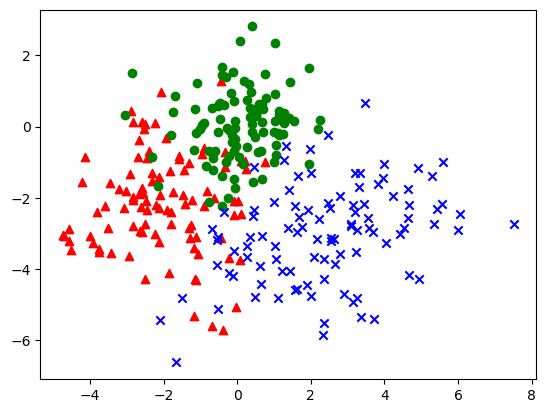

In [15]:
import matplotlib.pyplot as plt

# 绘制testA的散点图，红色，标记为'^'
plt.scatter(testA[:, 0], testA[:, 1], marker='^', c='r')

# 绘制testB的散点图，绿色，标记为'o'
plt.scatter(testB[:, 0], testB[:, 1], marker='o', c='g')

# 绘制testC的散点图，蓝色，标记为'x'
plt.scatter(testC[:, 0], testC[:, 1], marker='x', c='b')

# 如果你想更改颜色，只需在'c'参数中指定不同的颜色代码，例如'c='purple''
# plt.scatter(testA[:, 0], testA[:, 1], marker='^', c='purple')

# 显示图形
plt.show()


### task 2: compute the mean and variance of train data in each class

#### $\mu$ of trainA

In [16]:
muA = np.mean(trainA,0)
print(muA.shape)

(2,)


In [17]:
muA

array([-1.97111526, -1.90272101])

Question: why is it not **np.mean(trainA,1)**

In [18]:
covA = np.cov(trainA, rowvar= False) # Question: what if rowvar = True
print(covA.shape)

(2, 2)


In [19]:
# TODO 
muB = np.mean(trainB,0)
print(muB.shape)
muB
muC = np.mean(trainC,0)
print(muC.shape)
muC
covB = np.cov(trainB, rowvar= False)
print(covB.shape)
covB
covC = np.cov(trainC, rowvar= False)
print(covC.shape)
covC

(2,)
(2,)
(2, 2)
(2, 2)


array([[3.78162509, 1.07065637],
       [1.07065637, 1.5633716 ]])

In [20]:
muB = 3.78162509
muC = 1.07065637
covB = 1.07065637
covC = 1.5633716

#### task3: compute the posterior probabilities

you can use : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal

In [21]:
from scipy.stats import multivariate_normal

In [22]:
x = trainA[0]  # 选择trainA数据集中的第一个数据点作为x

# 训练数据集 trainA, trainB, trainC，分别表示类别A、B、C的样本

# 计算每个类别的样本数量
num_samples_A = len(trainA)
num_samples_B = len(trainB)
num_samples_C = len(trainC)

# 计算总样本数量
total_samples = num_samples_A + num_samples_B + num_samples_C

# 计算先验概率
priorA = num_samples_A / total_samples
priorB = num_samples_B / total_samples
priorC = num_samples_C / total_samples


In [23]:
from scipy.stats import multivariate_normal

# 计算数据点 'x' 属于类别A的概率密度值
pdf_A = multivariate_normal.pdf(x, muA, covA)

# 计算数据点 'x' 属于类别B的概率密度值
pdf_B = multivariate_normal.pdf(x, muB, covB)

# 计算数据点 'x' 属于类别C的概率密度值
pdf_C = multivariate_normal.pdf(x, muC, covC)

# 打印结果
print("概率密度值 for 类别A:", pdf_A)
print("概率密度值 for 类别B:", pdf_B)
print("概率密度值 for 类别C:", pdf_C)


概率密度值 for 类别A: 0.05980402430918528
概率密度值 for 类别B: [9.22859123e-09 4.56996361e-10]
概率密度值 for 类别C: [0.00759128 0.00232354]


In [56]:
# import numpy as np
# from scipy.stats import multivariate_normal

# def cal_mul_normals(x, muA, muB, muC, covA, covB, covC):
#     # 计算数据点 'x' 属于每个类别的概率密度值
#     ya = multivariate_normal.pdf(x, muA, covA)  # 类别A的概率密度值
#     yb = multivariate_normal.pdf(x, muB, covB)  # 类别B的概率密度值
#     yc = multivariate_normal.pdf(x, muC, covC)  # 类别C的概率密度值
    
#     # 将概率密度值堆叠为一个列向量
#     y = np.stack((ya, yb, yc), axis=1)
    
#     # 返回每个类别的概率密度值作为列向量
#     return y

import numpy as np
from scipy.stats import multivariate_normal

def cal_mul_normals(x, muA, muB, muC, covA, covB, covC, priorA, priorB, priorC):
    # 计算每个类别的概率密度
    likelihoodA = multivariate_normal.pdf(x, muA, covA)
    likelihoodB = multivariate_normal.pdf(x, muB, covB)
    likelihoodC = multivariate_normal.pdf(x, muC, covC)
    
    # 计算未归一化的后验概率
    posteriorA = priorA * likelihoodA
    posteriorB = priorB * likelihoodB
    posteriorC = priorC * likelihoodC
    
    # 归一化后验概率
    total_posterior = posteriorA + posteriorB + posteriorC
    posteriorA /= total_posterior
    posteriorB /= total_posterior
    posteriorC /= total_posterior
    
    # 将后验概率堆叠为一个列向量
    y = np.stack((posteriorA, posteriorB, posteriorC), axis=1)
    
    return posteriorA, posteriorB, posteriorC, y

# 调用函数计算后验概率和 y 值
posteriorA, posteriorB, posteriorC, y = cal_mul_normals(x, muA, muB, muC, covA, covB, covC, priorA, priorB, priorC)

# 打印后验概率
print("Posterior Probability for Class A:", posteriorA)
print("Posterior Probability for Class B:", posteriorB)
print("Posterior Probability for Class C:", posteriorC)

# 打印 y 值
print("y values:", y)


#### task 4: assign the data to the class has the maximum posterior probabilities

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def decision_rule_maximum_pos(y, test_set):
    '''
    该函数用于根据从三个高斯概率密度函数计算得出的最大后验概率来将数据点分类为A、B、C三类。
    
    输入:
    y: 从三个高斯概率密度函数计算得出的概率（三列）
    test_set: 测试集
    
    输出:
    result_A: 被分类为A的样本
    result_B: 被分类为B的样本
    result_C: 被分类为C的样本
    '''
    maximum_class = np.argmax(y, axis=1)  # 找到具有最大值的索引
    
    index_A = np.where(maximum_class == 0)  # 被分类为A的索引
    index_B = np.where(maximum_class == 1)  # 被分类为B的索引
    index_C = np.where(maximum_class == 2)  # 被分类为C的索引
    
    result_A = test_set[index_A, :].reshape((-1, 2))  # 获取被分类为A的数据
    result_B = test_set[index_B, :].reshape((-1, 2))  # 获取被分类为B的数据
    result_C = test_set[index_C, :].reshape((-1, 2))  # 获取被分类为C的数据
    
    plt.figure(figsize=(5, 5))
    plt.figure(figsize=(5, 5))
    plt.scatter(result_A[:, 0], result_A[:, 1], marker='^', c='r', label='Class A')
    plt.scatter(result_B[:, 0], result_B[:, 1], marker='o', c='g', label='Class B')
    plt.scatter(result_C[:, 0], result_C[:, 1], marker='s', c='b', label='Class C')
    plt.xlim([-6, 6])
    plt.ylim([-6, 6])
    plt.legend()
    plt.show()
    
    return result_A, result_B, result_C

<Figure size 500x500 with 0 Axes>

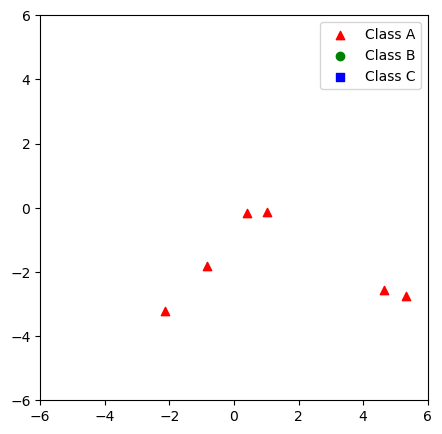

In [58]:
# 假设你有一个包含概率值 y 和测试集 test_set 的变量
# 调用 decision_rule_maximum_pos 函数来绘制图像
result_A, result_B, result_C = decision_rule_maximum_pos(y, test_set)
